In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


# 1. EDA & Preprocessing

In [3]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.shape

(48895, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Drop unnecessary columns for Modeling

In [7]:
data.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
data.fillna({'reviews_per_month':0}, inplace=True)
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
data.head(10)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


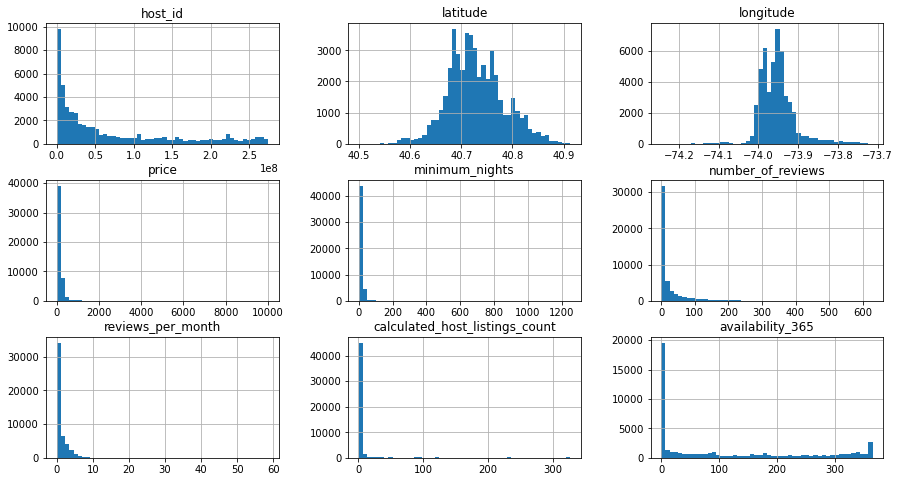

In [9]:
# Check Distributions of each variable
data.hist(figsize = (15,8), bins = 50)
plt.show()

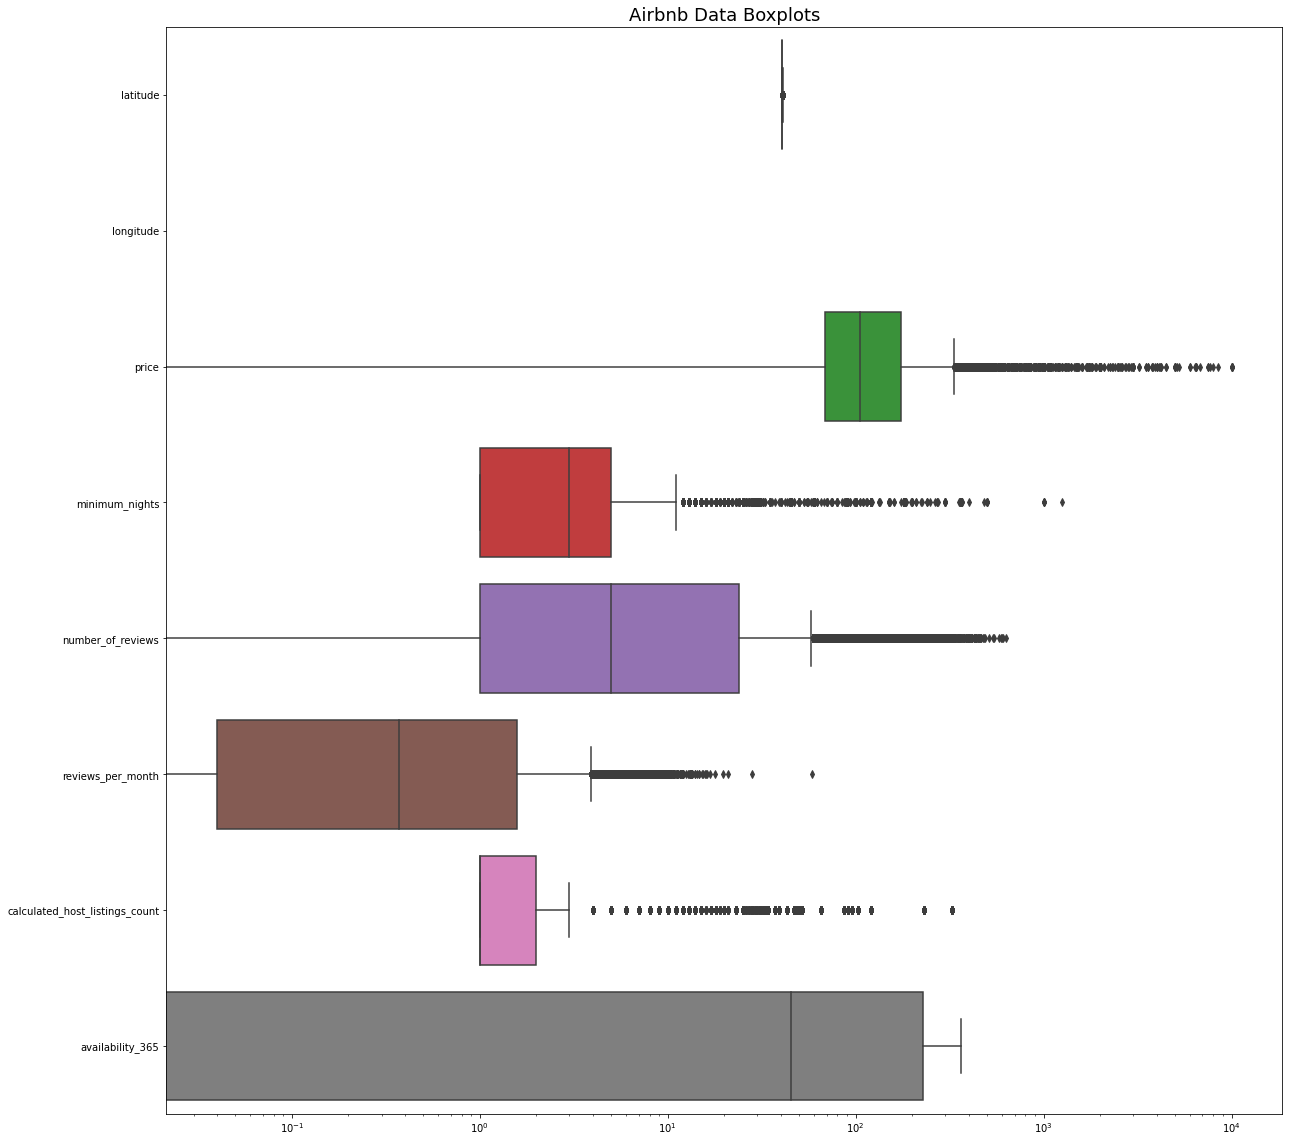

In [10]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = data.drop(columns = 'host_id'), orient="h")
ax.set_title('Airbnb Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

<AxesSubplot:>

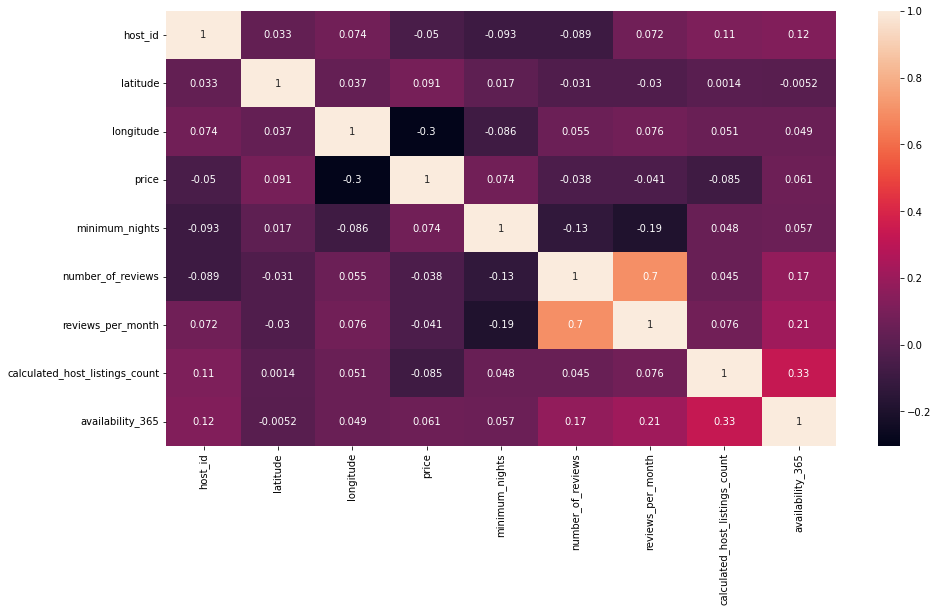

In [11]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

### Categorical Data Visualization

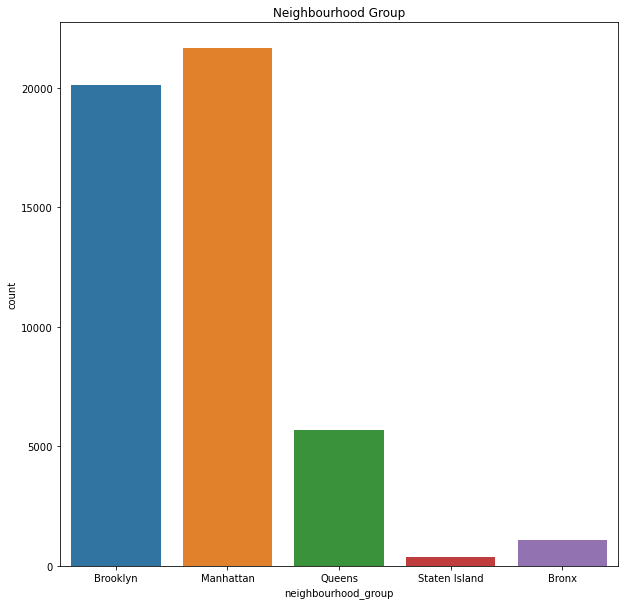

In [12]:
sns.countplot(data['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')
plt.show()

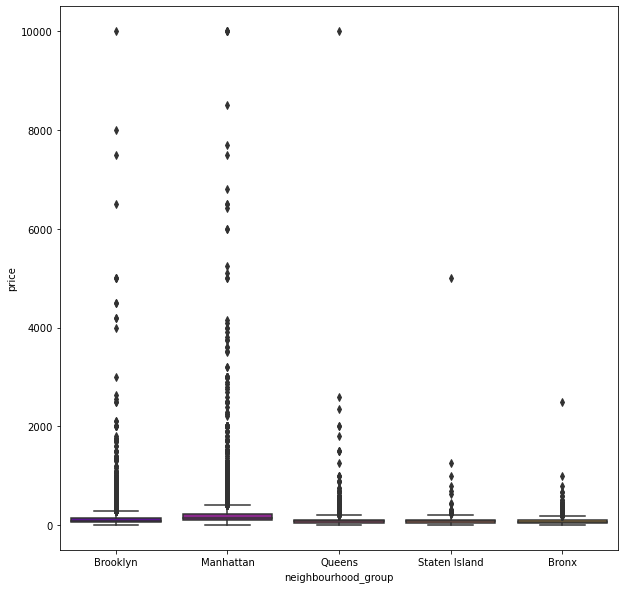

In [13]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='price',palette='plasma')

Text(0.5, 1.0, 'Room Type')

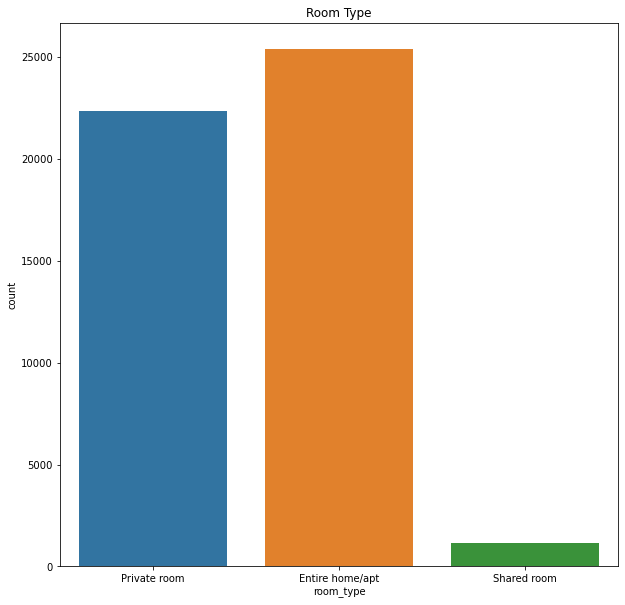

In [14]:
sns.countplot(data['room_type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room Type')

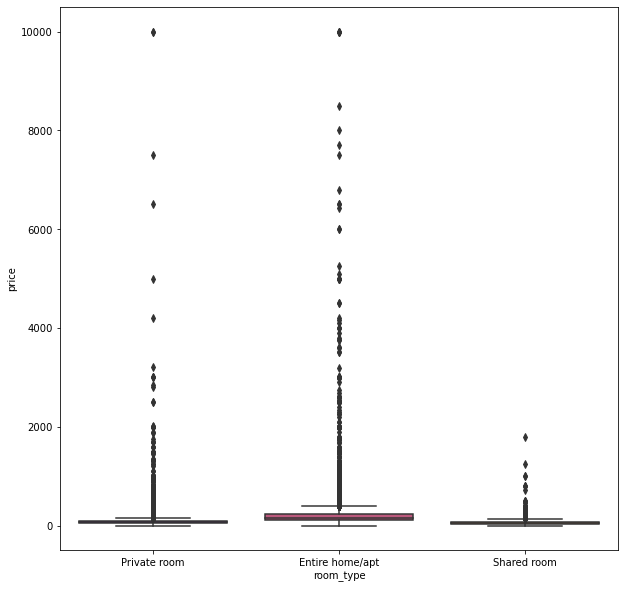

In [15]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, x='room_type',y='price',palette='plasma')

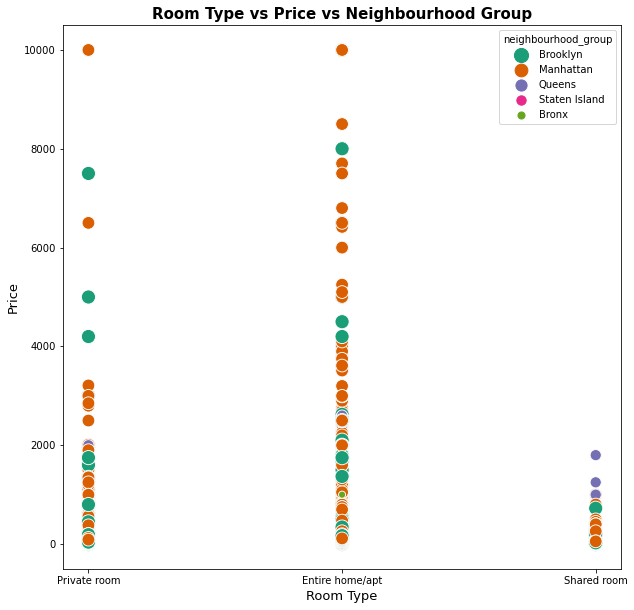

In [16]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=data)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')
plt.show()

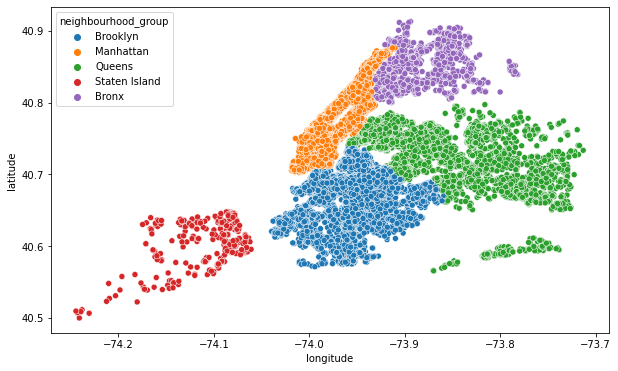

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
plt.show()

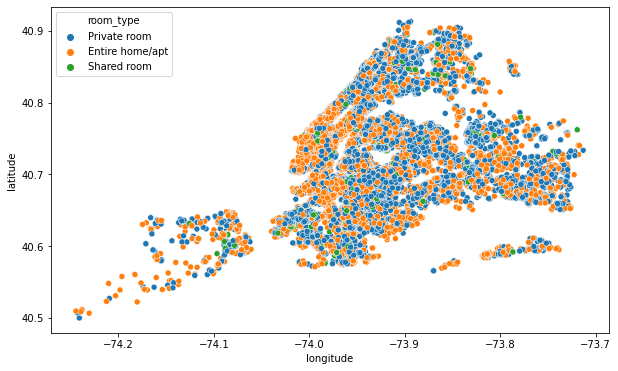

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type)
plt.show()

## Variable Transformation

In [19]:
data['neighbourhood_group']= data['neighbourhood_group'].astype("category").cat.codes
data['neighbourhood'] = data['neighbourhood'].astype("category").cat.codes
data['room_type'] = data['room_type'].astype("category").cat.codes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  int8   
 2   neighbourhood                   48895 non-null  int16  
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  int8   
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int16(1), int64(6

In [20]:
data.head(15)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,94,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,7192,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0
5,7322,2,137,40.74767,-73.97500,0,200,3,74,0.59,1,129
6,7356,1,13,40.68688,-73.95596,1,60,45,49,0.40,1,0
7,8967,2,95,40.76489,-73.98493,1,79,2,430,3.47,1,220
8,7490,2,202,40.80178,-73.96723,1,79,2,118,0.99,1,0
9,7549,2,35,40.71344,-73.99037,0,150,1,160,1.33,4,188


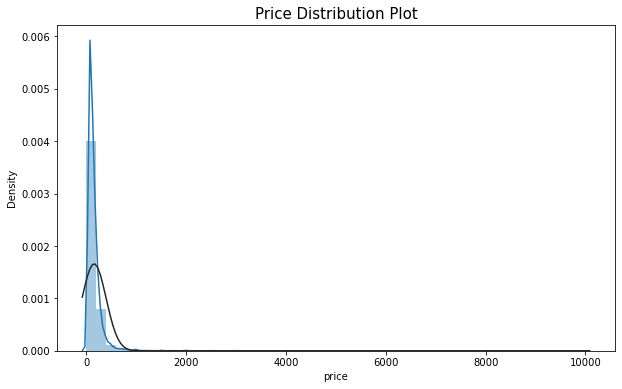

In [21]:
# Positive Skewed
plt.figure(figsize=(10,6))
sns.distplot(data['price'], fit=norm)
plt.title("Price Distribution Plot",size=15)
plt.show()

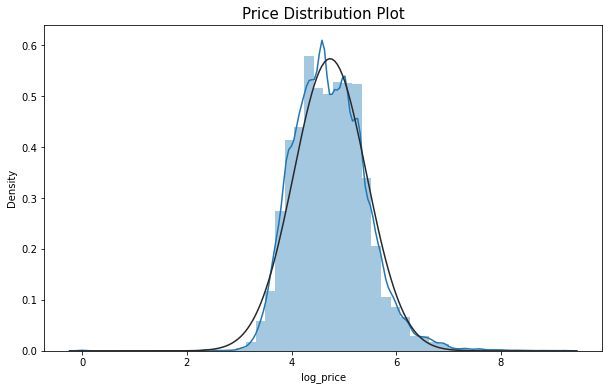

In [22]:
# Transformation
data['log_price'] = np.log1p(data['price'])
plt.figure(figsize=(10,6))
sns.distplot(data['log_price'], fit=norm)
plt.title("Price Distribution Plot",size=15)
plt.show()

<AxesSubplot:>

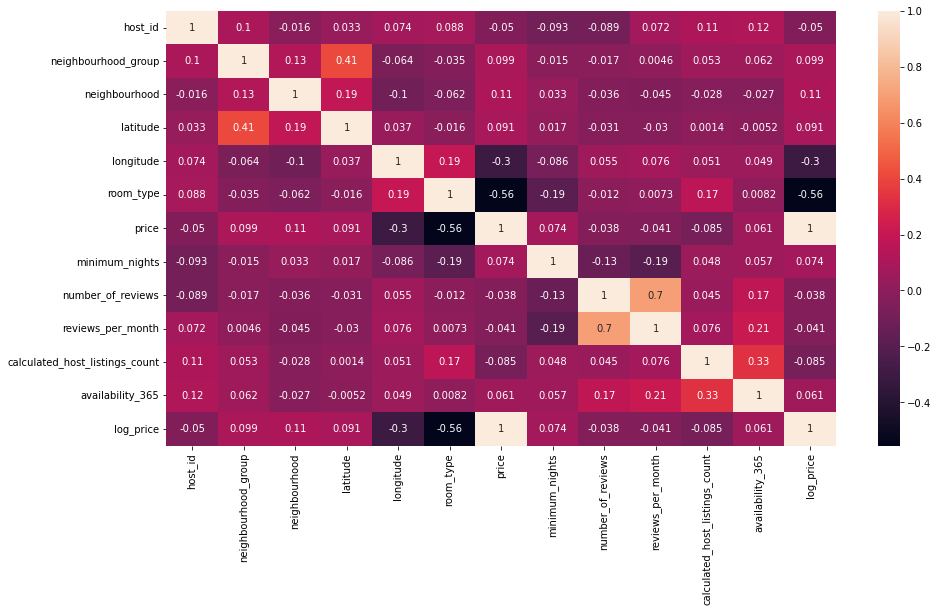

In [23]:
corr = data.corr('kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [24]:
X = data.drop(columns=['log_price','price','host_id'])
y = data['log_price']

In [25]:
#Eigen vector of a correlation matrix.
#None one of the eigenvalues of the correlation matrix is close to zero.
#It means that there is no multicollinearity exists in the data.
multicollinearity, V = np.linalg.eig(X.corr(method='kendall'))
np.round(multicollinearity,3)

array([1.92 , 1.524, 1.32 , 1.254, 0.3  , 0.922, 0.869, 0.561, 0.611,
       0.718])

## Feature Engineering

In [26]:
scaler = StandardScaler()
X_scaled = X.apply(lambda x: (x - x.mean()) / (x.std()))

In [27]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4,random_state = 1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,random_state = 1)
Xconc = pd.concat([X_train,X_val])
yconc = pd.concat([y_train,y_val])

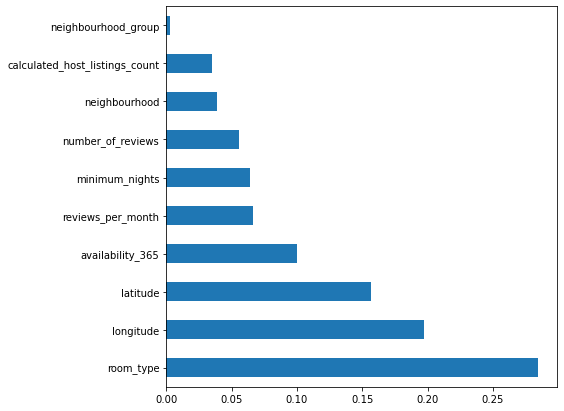

In [28]:
lab_enc = preprocessing.LabelEncoder()

feature_model = RandomForestRegressor(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=X.iloc[:,:].columns)
feat_importances.nlargest(X.shape[1]).plot(kind='barh')
plt.show()

# Models

## Linear Model

In [29]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, Xconc, yconc, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [82]:
res = dict()

### Ridge

In [30]:
model_ridge = Ridge()

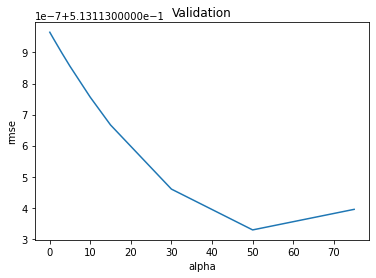

In [31]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()

In [32]:
cv_ridge.min()

0.5131133285893582

In [83]:
res['ridge'] = cv_ridge.min() 

### Lasso

In [84]:
model_lasso = LassoCV(alphas = [1, 0.5, 0.1, 0.05, 0.001, 0.0005]).fit(X_train, y_train)
rmse_cv(model_lasso).mean()

0.5131130415702999

In [85]:
res['lasso'] = rmse_cv(model_lasso).mean()

In [34]:
coef = pd.Series(model_lasso.coef_, index = X.columns)
print("Lasso selected " + str(sum(coef != 0)) + " variables and eliminated "\
      +  str(sum(coef == 0)) + " variables")


Lasso selected 10 variables and eliminated 0 variables


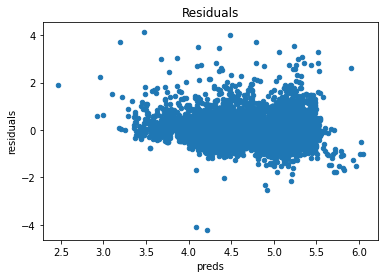

In [35]:
preds = pd.DataFrame({"preds":model_lasso.predict(X_test), "true":y_test})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.title("Residuals")
plt.show()

### Gradient Boosting (Random Guess)

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [37]:
gbrt = GradientBoostingRegressor(n_estimators = 120, max_depth = None, learning_rate = 0.05)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=None, n_estimators=120)

In [38]:
errors = [mean_squared_error(y_val, y_pred)
         for y_pred in gbrt.staged_predict(X_val)]
best_n_est = np.argmin(errors) + 1

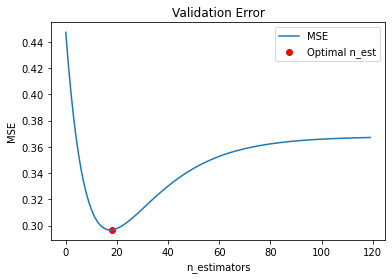

In [39]:
plt.plot(errors, label = 'MSE')
plt.scatter(best_n_est-1, errors[best_n_est-1], color = 'red', label = 'Optimal n_est')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend()
plt.title("Validation Error")
plt.show()

In [40]:
gbrt_best = GradientBoostingRegressor(n_estimators = best_n_est, max_depth = None, learning_rate = 0.05)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=None, n_estimators=19)

In [41]:
y_preds = gbrt_best.predict(X_test)

In [42]:
gb_mse = mean_squared_error(y_test, y_preds)
gb_rmse = np.sqrt(gb_mse)
print("MSE : {:.6f}".format(gb_mse))
print("RMSE : {:.6f}".format(gb_rmse))

MSE : 0.292419
RMSE : 0.540758


In [86]:
res['Gradient Random'] = gb_rmse

### With Grid Search

In [43]:
n_est = np.arange(10,101,10)
max_depth = np.arange(1,6,1)

In [44]:
param_grid = dict( n_estimators = n_est, max_depth = max_depth)
model = GradientBoostingRegressor(learning_rate = 0.05)
grid = GridSearchCV(estimator = model, param_grid=param_grid,
                   verbose=1, scoring='neg_mean_squared_error', cv=3, refit=True)
grid_result = grid.fit(Xconc, yconc)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [45]:
gb_df = pd.DataFrame(grid_result.cv_results_)

In [46]:
gb_final = grid_result.best_estimator_
gridgb_y_pred = gb_final.predict(X_test)

In [47]:
grid_gb_mse = mean_squared_error(y_test, gridgb_y_pred)
grid_gb_rmse = np.sqrt(grid_gb_mse)

print("MSE : {:.6f}".format(grid_gb_mse))
print("RMSE : {:.6f}".format(grid_gb_rmse))

MSE : 0.196311
RMSE : 0.443070


In [87]:
res['Gradient Grid'] = grid_gb_rmse

In [48]:
grid_result.best_estimator_

GradientBoostingRegressor(learning_rate=0.05, max_depth=5)

### XG Boost

In [49]:
import xgboost
from xgboost import XGBRegressor

In [50]:
param_grid = {
    'max_depth':[5,6,7,8],
    'n_estimators':np.arange(101,501,20),
    'min_child_weight' : [0,0.1,0.5,0.8],
    'eta' : [0.1],
    'colsample_bytree':[0.5,0.7,0.9],
    'alpha' : [1,1.5,2],
    'reg_alpha' : [1,1.5,2]
}

gridxg = RandomizedSearchCV(XGBRegressor(), param_distributions=param_grid, cv=3,
                      verbose=1, scoring='neg_mean_squared_error', refit=True
                      )
gridxg_result = gridxg.fit(Xconc, yconc)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [51]:
xg_df = pd.DataFrame(gridxg_result.cv_results_)

In [52]:
xg_final = gridxg_result.best_estimator_

In [53]:
gridxg_y_pred = xg_final.predict(X_test)

In [54]:
grid_xg_mse = mean_squared_error(y_test, gridxg_y_pred)
grid_xg_rmse = np.sqrt(grid_xg_mse)

print("MSE : {:.6f}".format(grid_xg_mse))
print("RMSE : {:.6f}".format(grid_xg_rmse))


MSE : 0.185570
RMSE : 0.430778


In [88]:
res['XG Boost'] = grid_xg_rmse

In [55]:
gridxg_result.best_estimator_

XGBRegressor(alpha=1.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=8, min_child_weight=0.1, missing=nan,
             monotone_constraints='()', n_estimators=161, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=2,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Nueral Network

In [56]:
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf

In [57]:
model = Sequential()
model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, input_dim = X_train.shape[1]))

model.compile(loss = "mse", optimizer = "adam", metrics=['mae'])

2022-04-16 12:22:49.512816: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


In [59]:
hist = model.fit(X_train, y_train,
                 epochs = 50,
                 batch_size = 512,
                 validation_data = (X_val, y_val),
                verbose = 0)

2022-04-16 12:22:49.727227: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


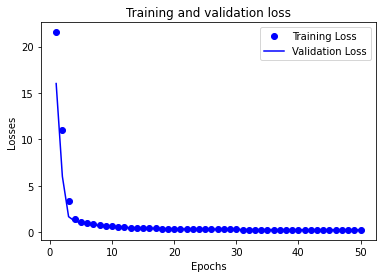

In [60]:
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = np.arange(1, len(loss) +1 )

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()

plt.show()

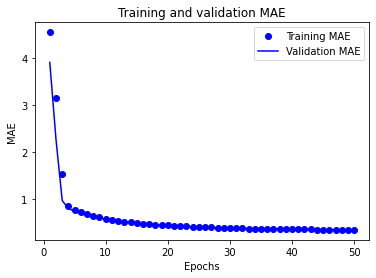

In [61]:
plt.clf()
MAE = history_dict['mae']
val_MAE = history_dict['val_mae']

plt.plot(epochs, MAE, 'bo', label = 'Training MAE')
plt.plot(epochs, val_MAE, 'b', label = 'Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [62]:
mse_score, mae_score = model.evaluate(X_test, y_test)
print("RMSE score : {:.6f}".format(np.sqrt(mse_score)))
print("MSE score : {:.6f}".format((mse_score)))
print("MAE score : {:.6f}".format(mae_score))

306/306 [==============================] - 0s 468us/step - loss: 0.2378 - mae: 0.3564
RMSE score : 0.487670
MSE score : 0.237822
MAE score : 0.356378


In [89]:
res['NN'] = np.sqrt(mse_score)

## Unsupervised (PCA)

In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(X_scaled)
airbnb_pca = pca.transform(X_scaled)
airbnb_pca[:5]

array([[-4.43117345e-03, -9.04814351e-01,  1.30571492e+00,
         9.95267479e-01,  4.30299572e-01, -1.41941042e+00],
       [ 2.00355838e-01,  1.16478172e+00,  7.39589154e-01,
        -4.19973805e-01, -1.91581157e-01, -8.29500306e-02],
       [-9.34031895e-04,  1.20494133e+00, -5.11150302e-01,
         1.49386534e+00,  8.12824507e-02, -6.67415995e-01],
       [ 4.91960335e+00, -6.97595750e-01,  2.00167259e+00,
        -2.14903872e+00,  4.58693400e-01,  5.85573599e-01],
       [-8.06472536e-01,  4.25460952e-01, -7.38134217e-01,
        -1.85559778e-01, -5.74705351e-01,  1.28512946e+00]])

In [92]:
pca.explained_variance_ratio_

array([0.17609537, 0.14772841, 0.13531169, 0.11760884, 0.08957947,
       0.08584135])

In [105]:
print(f'Variability Explained: {np.sum(pca.explained_variance_ratio_)*100:.3f}%')

Variability Explained: 75.217%


In [95]:
X_trpc, X_testpc, y_trpc, y_testpc = train_test_split(airbnb_pca, y, test_size=0.3,random_state = 1)

In [96]:
n_est = np.arange(10,31,5)
max_depth = np.arange(1,6,1)
param_grid = dict( n_estimators = n_est, max_depth = max_depth)
model = GradientBoostingRegressor(learning_rate = 0.05)
gridpc = GridSearchCV(estimator = model, param_grid=param_grid,
                   verbose=1, scoring='neg_mean_squared_error', cv=3, refit=True)
gridpc_result = grid.fit(X_trpc, y_trpc)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [97]:
gbpc_df = pd.DataFrame(gridpc_result.cv_results_)

In [98]:
gbpc_final = gridpc_result.best_estimator_
gridgbpc_y_pred = gbpc_final.predict(X_testpc)

In [99]:
gridpc_gb_mse = mean_squared_error(y_testpc, gridgbpc_y_pred)
gridpc_gb_rmse = np.sqrt(gridpc_gb_mse)
print("MSE with PCA: {:.6f}".format(gridpc_gb_mse))
print("RMSE with PCA: {:.6f}".format(gridpc_gb_rmse))

MSE with PCA: 0.235711
RMSE with PCA: 0.485501


In [106]:
res['PCA_GB'] = gridpc_gb_rmse

In [100]:
param_grid_xg = dict( n_estimators = n_est, max_depth = max_depth)
model_xg = XGBRegressor(learning_rate = 0.05)
grid_xg_pc = GridSearchCV(estimator = model, param_grid=param_grid_xg,
                   verbose=1, scoring='neg_mean_squared_error', cv=3, refit=True)
grid_xg_pc_result = grid_xg_pc.fit(X_trpc, y_trpc)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [101]:
xgpc_df = pd.DataFrame(grid_xg_pc_result.cv_results_)

In [102]:
xgpc_final = grid_xg_pc_result.best_estimator_
gridxgpc_y_pred = xgpc_final.predict(X_testpc)

In [103]:
gridpc_xg_mse = mean_squared_error(y_testpc, gridxgpc_y_pred)
gridpc_xg_rmse = np.sqrt(gridpc_xg_mse)
print("MSE with PCA: {:.6f}".format(gridpc_xg_mse))
print("RMSE with PCA: {:.6f}".format(gridpc_xg_rmse))

MSE with PCA: 0.268105
RMSE with PCA: 0.517788


In [108]:
res['PCA_XG'] = gridpc_xg_rmse

# Result

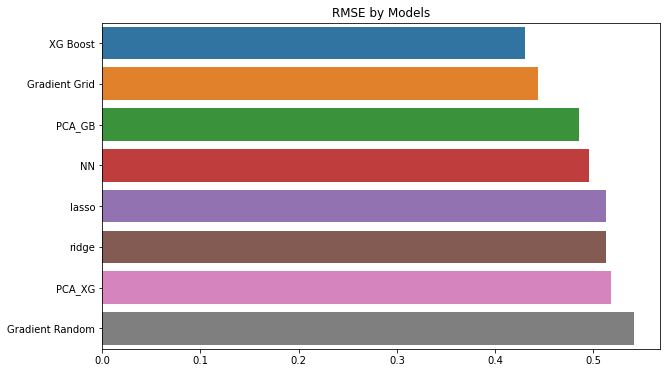

In [120]:
res_sr = pd.Series(res)
res_sr.sort_values(ascending = True, inplace = True)
plt.figure(figsize = (10,6))
sns.barplot( x = res_sr, y = res_sr.index)
plt.title("RMSE by Models")
plt.show()